# https://talkingaboutme.tistory.com/entry/DL-%ED%95%B4%EB%B3%B4%EB%A9%B4%EC%84%9C-%EB%B0%B0%EC%9A%B0%EB%8A%94-%EB%94%A5%EB%9F%AC%EB%8B%9D-ANN-%EA%B5%AC%ED%98%84-1?category=538748
# 링크

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data/datasets_156197_358170_Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 데이터
- 나이 
- 사용기간 
- Numofproduct : 고객이 활용하는 은행 상품 수
- balance : 고객의 은행 잔고
- HasCrCard : 이진 플래그,  고객이 크래딧카드 가지고 있는지 여부
- isActiveMember : 은행에 활동 중인지 여부 
- EstimatedSalary : 고객의 예상급여


In [3]:
sns.heatmap(churn_corr,annot = True)

NameError: name 'churn_corr' is not defined

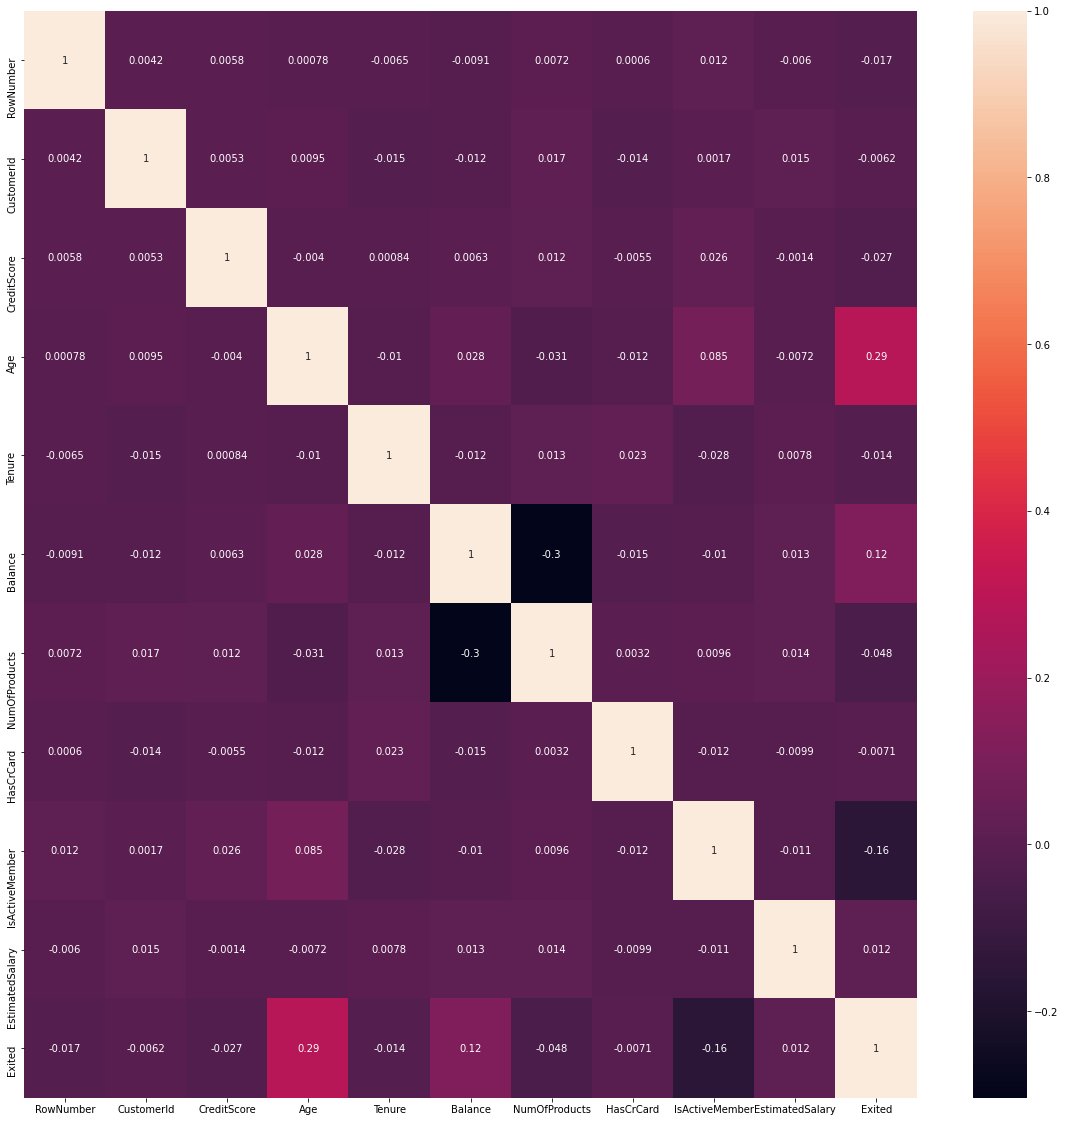

In [4]:
# 20x20 사이즈의 표로 그려달라
plt.figure(figsize = (20,20))
# 연속형 데이터에 대해서 상관관계 분석 가능
# pd.corr() 하면 상관계수가 있는 df이 만들어짐 
churn_corr = dataset.corr()
churn_corr_top = churn_corr.index
# annot 각 셀에 숫자를 입력, fmt = 'd' 는 정수 형태로 숫자 입력하라는 뜻
sns.heatmap(dataset[churn_corr_top].corr(), annot = True)


# 모든행 특정열 pdV.iloc[:, a:b]

In [5]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

# 명목형 변수들 바꿔주는 방법 pd.get_dummies
## prefix = '하고싶은변수이름' 더미들앞에 이름 붙여짐_ 포함
# applymap 방법도 있음

# 2개는 1개로 3개는 2개로 열을 가져옴

In [6]:
geography = pd.get_dummies(dataset['Geography'], drop_first = True)
gender = pd.get_dummies(dataset['Gender'], drop_first = True)
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [7]:
gender1 = pd.get_dummies(dataset['Gender'])
gender1.head()

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [8]:
# 열 합병
X = pd.concat([X, geography, gender], axis=1)

In [9]:
# 열 지우기 
X = X.drop(['Geography', 'Gender'], axis=1)

In [10]:
from sklearn.model_selection import train_test_split
#트레이닝, 테스트셋 나누기

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# 특성공학 feature Scaling
### StandardScaler 사용해서 모든 열들의 값들을 바꿈

In [12]:
from sklearn.preprocessing import StandardScaler

# StandardScaler(x) : 평균이 0과 표준편차가 1이 되도록 변환
    - fit_transform 은 학습용 데이터의 분포를 추정하고 변환
    - 검증용 데이터 변환 , 검증용 데이터를 입력으로 하여 검증용 데이터를 변환한다.
# MinMaxScaler(X): 최대값이 각각 1, 최소값이 0이 되도록 변환

In [13]:
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [16]:
classifier = Sequential()

In [17]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))
classifier.add(Dropout(0.1))

In [18]:
# Adding the second hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dropout(0.1))

In [19]:
# Adding the output layer
classifier.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [20]:
# Compiling the ANN
classifier.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 1s 1ms/step - loss: 0.6458 - accuracy: 0.7557 - val_loss: 0.5740 - val_accuracy: 0.7811
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5669 - accuracy: 0.7893 - val_loss: 0.5185 - val_accuracy: 0.7952
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5254 - accuracy: 0.7953 - val_loss: 0.4911 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5012 - accuracy: 0.7959 - val_loss: 0.4756 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4857 - accuracy: 0.7960 - val_loss: 0.4659 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4797 - accuracy: 0.7960 - val_loss: 0.4596 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4714 - accuracy: 0.7960 - val_loss: 0.4546 - val_accuracy: 0.7955

536/536 [==============================] - 1s 979us/step - loss: 0.3980 - accuracy: 0.8168 - val_loss: 0.3776 - val_accuracy: 0.8160
Epoch 58/100
536/536 [==============================] - 1s 984us/step - loss: 0.3934 - accuracy: 0.8147 - val_loss: 0.3772 - val_accuracy: 0.8164
Epoch 59/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3857 - accuracy: 0.8192 - val_loss: 0.3762 - val_accuracy: 0.8164
Epoch 60/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3889 - accuracy: 0.8182 - val_loss: 0.3755 - val_accuracy: 0.8164
Epoch 61/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3963 - accuracy: 0.8162 - val_loss: 0.3750 - val_accuracy: 0.8160
Epoch 62/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3905 - accuracy: 0.8169 - val_loss: 0.3745 - val_accuracy: 0.8160
Epoch 63/100
536/536 [==============================] - 1s 995us/step - loss: 0.3909 - accuracy: 0.8177 - val_loss: 0.3742 - val_accuracy: 0.8164

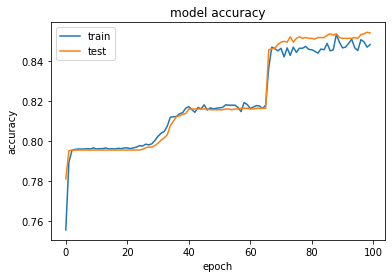

In [23]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

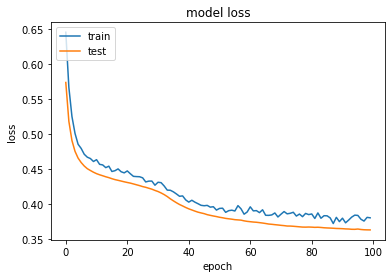

In [24]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [26]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [27]:
cm

array([[1533,   62],
       [ 208,  197]], dtype=int64)

In [28]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)

In [29]:
score

0.865

# Hyper parameter Tuning for DNN

https://wikidocs.net/32105

In [31]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid

# layers와 activation 을 입력받고 모델을 생성하는 함수
## 몇개 인지 안새도됨input_dim = X_train.shape[1]

In [32]:

def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i == 0:
            model.add(Dense(nodes, kernel_initializer = 'he_uniform',activation=activation,input_dim = X_train.shape[1]))
            model.add(Dropout(0.1))
        else:
            model.add(Dense(nodes, kernel_initializer = 'he_uniform',activation=activation))
            model.add(Dropout(0.1))

    # Adding the output layer
    model.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
                           
    # Compiling the ANN
    model.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [33]:
model = KerasClassifier(build_fn=create_model, verbose=0)
layers = [(6, 3, 3), (10, 10), (45, 30, 15)]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)
grid_result = grid.fit(X_train, y_train)

In [34]:
[grid_result.best_score_,grid_result.best_params_]

[0.8379999995231628,
 {'activation': 'relu',
  'batch_size': 128,
  'epochs': 30,
  'layers': (45, 30, 15)}]

# XGboost
- XGBoost는 여러개의 Decision Tree를 조합해서 사용하는 Ensemble 알고리즘이다.
- Ensemble은 방식에 따라서 Bagging과 Boosting 으로 분류된다.
- Boosting은 원리가 다른데 먼저 m1~3 모델이 있을때, m1에는 x에서 샘플링된 데이터를 넣는다. 그리고, 나온 결과중에서, 예측이 잘못된 x중의 값들에 가중치를 반영해서 다음 모델인 m2에 넣는다.  마찬가지로 y2 결과에서 예측이 잘못된 x’에 값들에 가중치를 반영해서 m3에 넣는다. 그리고, 각 모델의 성능이 다르기 때문에, 각 모델에 가중치 W를 반영한다.

## Hyper Parameter Optimization for xgboost

## https://bcho.tistory.com/1354

In [35]:
params = {
    "max_depth": [3, 4, 5, 6, 8, 10, 12, 15],
    "learning_rate": [0.5, 0.10, 0.15, 0.20, 0.25, 0.30],
    "min_child_weight": [1, 3, 5, 7],
    "gamma": [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7]
}

In [37]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [38]:
xgb_init = xgboost.XGBClassifier()

In [39]:
random_cv = RandomizedSearchCV(xgb_init, param_distributions=params, n_iter=5, scoring="roc_auc", n_jobs=1, cv=5, verbose=3)

In [40]:
random_cv.fit(X, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.4 
[CV]  min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.4, score=0.868, total=   0.2s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[CV] min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.4 
[CV]  min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.4, score=0.864, total=   0.2s
[CV] min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.4, score=0.862, total=   0.2s
[CV] min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.4 
[CV]  min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.4, score=0.865, total=   0.2s
[CV] min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.4 
[CV]  min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.4, score=0.862, total=   0.2s
[CV] min_child_weight=5, max_depth=6, learning_rate=0.15, gamma=0.3, colsample_bytree=0.7 
[CV]  min_child_weight=5, max_depth=6, learning_rate=0.15, gamma=0.3, colsample_bytree=0.7, score=0.864, total=   0.3s
[CV] min_child_weight=5, max_depth=6, learning_rate=0.15, gamma=0.3, colsample_bytree=0.7 
[CV]  min_child_weight=5, max_depth=6, learning_rate=0.15, gamma=0.3, colsample_bytree=0.7, score=0.865, total=   0.3s
[CV] min_child_weight=5, max_depth=6, learning

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    7.6s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [41]:
random_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
random_cv.best_params_

{'min_child_weight': 5,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.4}

In [43]:
xgb_classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
predict = cross_val_score(xgb_classifier, X, y, cv=10)
predict

array([0.872, 0.862, 0.877, 0.866, 0.858, 0.853, 0.868, 0.867, 0.863,
       0.852])

In [46]:
predict = predict.mean()
predict

0.8638

In [47]:
print('Deep-Learning:', score)
print('XGBoost:', predict)

Deep-Learning: 0.865
XGBoost: 0.8638
